# K-means(集群分析)

k-means 是一種clustering(分群)演算法，通常cluster都是基於非監督式的演算法，也就是說對於資料來說他沒有正確答案(標籤)，訓練後的模型只能告訴你，預測資料與那些資料的性質非常相近， k-means的想法跟knn非常接近，**通常資料本身就是周圍5個資料的平均值**這是統計學上的一種神奇現象，也就是古語的近朱者赤近墨者黑，我們透過資料之間的距離關係來決定該把那些資料分成一類。在實際的做法中我們以先隨機分群然後透過資料慢慢更新群心的方式找出最佳的分類方式。



## 演算法:


1. 我們先設定好要分成多少(k)群。

2. 然後在feature space(假設資料是d維，則會組出d維空間)隨機給k個群心。

3. 每個資料都會所有k個群心算歐式距離(這邊距離當然也可以換成別種距離公式，但基本上都還是以歐式距離為主)。

4. 將每筆資料分類判給距離最近的那個群。

5. 將每個群做mean取群心更新原本K群的群心

6. 一直重複3–5，直到收斂(群心變化不大)選出variation最小的(分類效果最成功的)，結束。


## 如何找出好的K

原則上我們可以透過演算法找出相對較好的K，但是通常最簡單的做法是找出不同K值能得到的最佳variation然後再選出其中最好的作為最佳K。

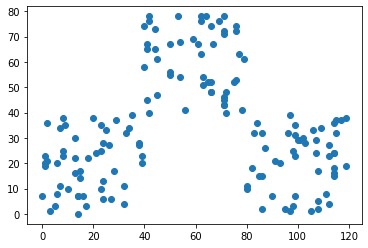

In [1]:
# 原始資料


import numpy as np
import matplotlib.pyplot as plt



np.random.seed(42)

X = []

# class 1
for i in range(50):
    X.append([np.random.randint(0, 40), np.random.randint(0, 40)])

# class 2
for i in range(50):
    X.append([np.random.randint(40, 80), np.random.randint(40, 80)])

# class 3
for i in range(50):
    X.append([np.random.randint(80, 120), np.random.randint(0, 40)])
    
X = np.array(X).astype(int)






#顯示資料
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [2]:
def cluster(data, centers):
    
    y = []
    
    for center in centers:
        d = (data-center)**2
        d = d.sum(axis=1)
        y.append(d.reshape(-1, 1)) # reshape(data size, 1)
    y = np.concatenate(y, axis=1) # 按照row去結合 shape = (data size, kernel num)
    return y.argmin(axis=1)


def get_centers_by_clusters(X, Y):
    
    labels = list(set(Y))
    centers = []
    
    for label in labels:
        indecis = [label == y for y in Y]
        x = X[indecis]
        centers.append(x.mean(axis=0))
    return np.array(centers)




def k_means(X, k, epochs=5):
    
    past_centers = None
    centers = np.random.randint(0, len(X), k) # 隨機取3點作為群心
    current_centers = X[centers]
    
    
    # 以loop方式循環更新群心
    for e in range(epochs):
        Y = cluster(X, current_centers)
        #顯示分類結果
        plt.scatter(X[:, 0], X[:, 1], c=Y)
        plt.title('epoch: %d' %(e+1))
        plt.show()
        
        # 更新群心
        past_centers = current_centers
        current_centers = get_centers_by_clusters(X, Y) 
        
        
        
    #顯示最終分類結果
    Y = cluster(X, current_centers)
    plt.scatter(X[:, 0], X[:, 1], c=Y)
    plt.title('final')
    plt.show()
        
    


    

[[ 17.66  19.92]
 [ 60.26  60.46]
 [101.4   21.24]]


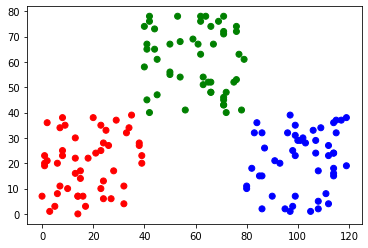

In [3]:
# 原始分類狀況


color = ['red', 'green', 'blue']

centers = np.array([[20, 20], [60, 60], [100, 20]])
Y = cluster(X, centers) # 產生分群
new_centers = get_centers_by_clusters(X, Y)
print(new_centers)
Y = cluster(X, new_centers) # 產生分群

#顯示分類結果
plt.scatter(X[:, 0], X[:, 1], color = [color[i] for i in Y])
plt.show()


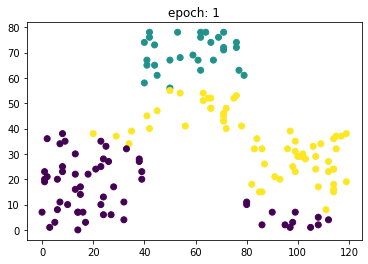

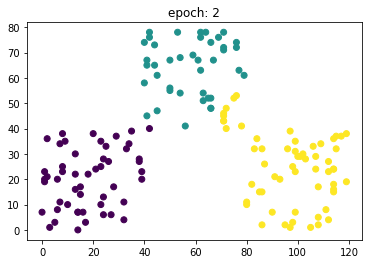

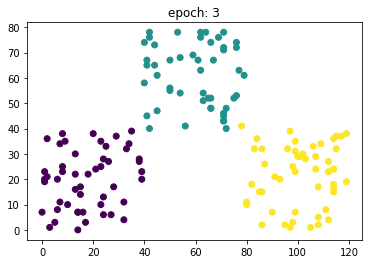

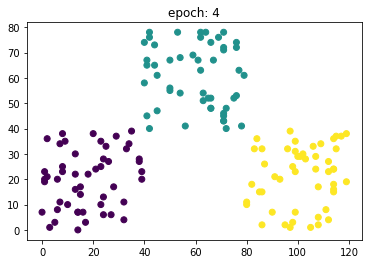

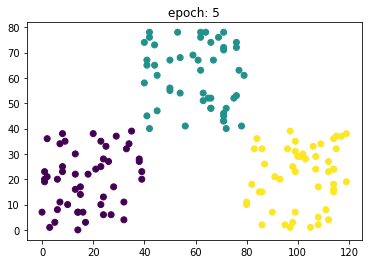

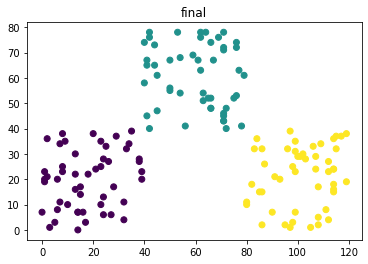

In [4]:
# k-means 分類狀況



k_means(X, 3)
